In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset =pd.read_csv("loan_dataset.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Department,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP00001,Male,No,HR,Graduate,No,26453.0,2297.0,534.0,60.0,1.0,Semiurban,Y
1,LP00002,Female,NaN,HR,Graduate,No,43207.0,5101.0,584.0,360.0,0.0,Urban,NaN
2,LP00003,Female,No,Finance,Graduate,Yes,21018.0,3607.0,555.0,240.0,0.0,Urban,N


In [ ]:
dataset.shape

In [4]:
dataset.isnull().sum()

Loan_ID               0
Gender                5
Married               6
Department            5
Education            12
Self_Employed        15
ApplicantIncome      12
CoapplicantIncome    11
LoanAmount           10
Loan_Amount_Term      3
Credit_History       10
Property_Area        13
Loan_Status          12
dtype: int64

In [5]:
dataset["CoapplicantIncome"].fillna(dataset["CoapplicantIncome"].mode()[0],inplace=True)

C:\Users\SHRAVANI\AppData\Local\Temp\ipykernel_260\52047453.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["CoapplicantIncome"].fillna(dataset["CoapplicantIncome"].mode()[0],inplace=True)


In [6]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,88.000000,100.000000,90.000000,97.000000,90.000000
mean,26531.840909,10566.780000,398.844444,183.340206,0.411111
std,14604.458394,7589.259147,188.086874,123.228352,0.494792
min,1390.000000,253.000000,52.000000,12.000000,0.000000
25%,13871.250000,3796.000000,273.500000,60.000000,0.000000
50%,27486.000000,9835.500000,404.500000,180.000000,0.000000
75%,39461.000000,16995.000000,563.000000,300.000000,1.000000
max,49337.000000,24684.000000,690.000000,360.000000,1.000000


<Axes: xlabel='CoapplicantIncome'>

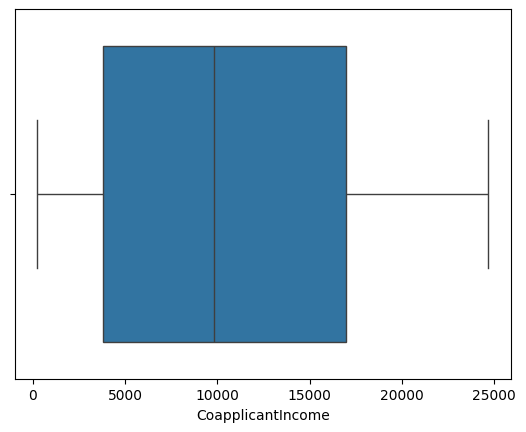

In [7]:
sns.boxplot(x="CoapplicantIncome", data=dataset)

C:\Users\SHRAVANI\AppData\Local\Temp\ipykernel_260\2328021184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

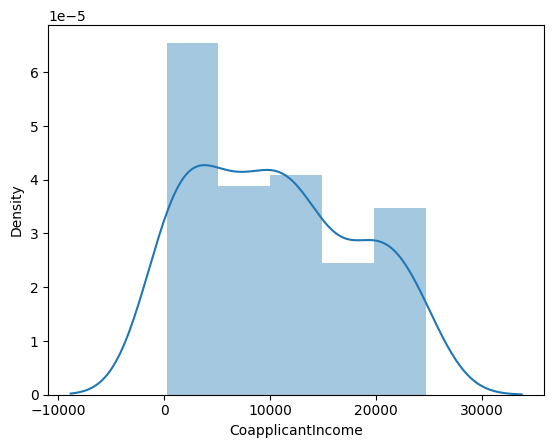

In [8]:
sns.distplot(dataset["CoapplicantIncome"])

In [9]:
#directly

In [10]:
min_range = dataset["CoapplicantIncome"].mean() - 3*dataset["CoapplicantIncome"].std()
max_range = dataset["CoapplicantIncome"].mean() + 3*dataset["CoapplicantIncome"].std()

In [11]:
min_range,max_range

(np.float64(-12200.997440057692), np.float64(33334.557440057695))

In [12]:
new_data =dataset[dataset["CoapplicantIncome"]<= max_range]

<Axes: xlabel='CoapplicantIncome'>

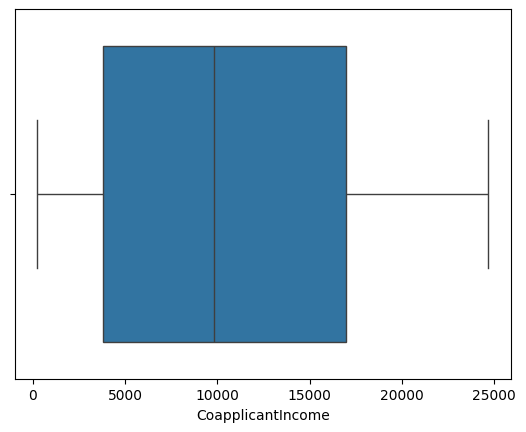

In [13]:
sns.boxplot(x="CoapplicantIncome", data=dataset)

In [ ]:
# zscore  (x - mean)/SD

In [14]:
z_score =(dataset["CoapplicantIncome"] - dataset["CoapplicantIncome"].mean())/(dataset["CoapplicantIncome"].std())

In [16]:
dataset["z_score"]=z_score 

In [17]:
dataset[dataset["z_score"]<3]

,Loan_ID,Gender,Married,Department,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP00001,Male,No,HR,Graduate,No,26453.0,2297.0,534.0,60.0,1.0,Semiurban,Y,-1.089669
1,LP00002,Female,NaN,HR,Graduate,No,43207.0,5101.0,584.0,360.0,0.0,Urban,NaN,-0.720199
2,LP00003,Female,No,Finance,Graduate,Yes,21018.0,3607.0,555.0,240.0,0.0,Urban,N,-0.917057
3,LP00004,Female,Yes,Finance,Not Graduate,Yes,NaN,602.0,NaN,300.0,0.0,Semiurban,Y,-1.313011
4,LP00005,NaN,No,Finance,Graduate,No,34070.0,4473.0,394.0,12.0,1.0,Rural,Y,-0.802948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP00096,Male,Yes,Finance,NaN,Yes,3968.0,18547.0,266.0,360.0,1.0,Urban,N,1.051515
96,LP00097,Female,NaN,Sales,NaN,Yes,46489.0,9012.0,446.0,60.0,1.0,Rural,Y,-0.204866
97,LP00098,NaN,No,Sales,Not Graduate,Yes,31250.0,12330.0,437.0,60.0,0.0,Semiurban,Y,0.232331
98,LP00099,Female,No,Finance,Not Graduate,No,NaN,3535.0,99.0,180.0,0.0,Semiurban,Y,-0.926544
